In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
HOST = "https://www.ptt.cc"

headers = {"cookie": "over18=1;"}

In [3]:
res = requests.get(HOST + "/bbs/NBA/index.html", headers=headers)

In [4]:
soup = BeautifulSoup(res.text, 'html.parser')

In [5]:
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8">
<meta content="width=device-width, initial-scale=1" name="viewport">
<title>看板 NBA 文章列表 - 批踢踢實業坊</title>
<link href="//images.ptt.cc/bbs/v2.22/bbs-common.css" rel="stylesheet" type="text/css">
<link href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen" rel="stylesheet" type="text/css">
<link href="//images.ptt.cc/bbs/v2.22/bbs-custom.css" rel="stylesheet" type="text/css">
<link href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen" rel="stylesheet" type="text/css">
<link href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print" rel="stylesheet" type="text/css">
</link></link></link></link></link></meta></meta></head>
<body>
<div id="topbar-container">
<div class="bbs-content" id="topbar">
<a href="/" id="logo">批踢踢實業坊</a>
<span>›</span>
<a class="board" href="/bbs/NBA/index.html"><span class="board-label">看板 </span>NBA</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html"

In [6]:
links = soup.select('.title > a')
links

[<a href="/bbs/NBA/M.1508398628.A.42B.html">[公告] NBA 樂透開獎</a>,
 <a href="/bbs/NBA/M.1508398644.A.98C.html">[情報] 湖人聘請 Antawn Jamison 做球探</a>,
 <a href="/bbs/NBA/M.1508398994.A.CF5.html">[情報] 波波：過去我沒用好AGG，98.75%的責任在</a>,
 <a href="/bbs/NBA/M.1508399045.A.349.html">[新聞] 山寨K湯無人認出輕鬆闖進勇士主場與KD合</a>,
 <a href="/bbs/NBA/M.1508399113.A.D91.html">[公告] NBA 板 開始舉辦樂透!</a>,
 <a href="/bbs/NBA/M.1508399121.A.F41.html">[新聞] 談生涯首秀 西蒙斯：好像在打2K</a>,
 <a href="/bbs/NBA/M.1508399608.A.5BD.html">[新聞] 開幕戰慘輸48分 太陽寫聯盟最難堪紀錄</a>,
 <a href="/bbs/NBA/M.1508400376.A.BA1.html">[情報] 西蒙斯宛如年輕詹皇  前輩牆哥慘遭守死</a>,
 <a href="/bbs/NBA/M.1508401430.A.81F.html">[討論] 傷後復出最成功的球員？</a>,
 <a href="/bbs/NBA/M.1508402007.A.193.html">[討論] 喬丹職業生涯似乎很少有飽受傷痛影響 ?</a>,
 <a href="/bbs/NBA/M.1498032247.A.C30.html">[情報] 2017-18 自由球員市場異動整理表 (9/26)</a>,
 <a href="/bbs/NBA/M.1498617800.A.690.html">[情報] 2017-18 自由球員市場異動 (逐日文字版)</a>,
 <a href="/bbs/NBA/M.1504521964.A.8F9.html">[公告] 板規v6.2</a>,
 <a href="/bbs/NBA/M.1508347111.A.CFC.html">[情報] NBA例行賽轉播整

In [7]:
articleLink = links[0]['href']
articleTitle = links[0].text
print(articleLink)
print(articleTitle)

/bbs/NBA/M.1508398628.A.42B.html
[公告] NBA 樂透開獎


In [8]:
for link in links:
    print("link is %s" % HOST + link['href'])
    print("title is %s" % link.text)
    print("==" * 50)

link is https://www.ptt.cc/bbs/NBA/M.1508398628.A.42B.html
title is [公告] NBA 樂透開獎
link is https://www.ptt.cc/bbs/NBA/M.1508398644.A.98C.html
title is [情報] 湖人聘請 Antawn Jamison 做球探
link is https://www.ptt.cc/bbs/NBA/M.1508398994.A.CF5.html
title is [情報] 波波：過去我沒用好AGG，98.75%的責任在
link is https://www.ptt.cc/bbs/NBA/M.1508399045.A.349.html
title is [新聞] 山寨K湯無人認出輕鬆闖進勇士主場與KD合
link is https://www.ptt.cc/bbs/NBA/M.1508399113.A.D91.html
title is [公告] NBA 板 開始舉辦樂透!
link is https://www.ptt.cc/bbs/NBA/M.1508399121.A.F41.html
title is [新聞] 談生涯首秀 西蒙斯：好像在打2K
link is https://www.ptt.cc/bbs/NBA/M.1508399608.A.5BD.html
title is [新聞] 開幕戰慘輸48分 太陽寫聯盟最難堪紀錄
link is https://www.ptt.cc/bbs/NBA/M.1508400376.A.BA1.html
title is [情報] 西蒙斯宛如年輕詹皇  前輩牆哥慘遭守死
link is https://www.ptt.cc/bbs/NBA/M.1508401430.A.81F.html
title is [討論] 傷後復出最成功的球員？
link is https://www.ptt.cc/bbs/NBA/M.1508402007.A.193.html
title is [討論] 喬丹職業生涯似乎很少有飽受傷痛影響 ?
link is https://www.ptt.cc/bbs/NBA/M.1498032247.A.C30.html
title is [情報] 2017-18 自由球員市場異動

In [26]:
url = "https://www.ptt.cc/bbs/NBA/M.1508310106.A.E6A.html"
url

'https://www.ptt.cc/bbs/NBA/M.1508310106.A.E6A.html'

In [27]:
res2 = requests.get(url)

In [28]:
soup2 = BeautifulSoup(res2.text, 'html.parser')

In [29]:
soup2

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8">
<meta content="width=device-width, initial-scale=1" name="viewport">
<title>[新聞] 打壞勇士領戒興致 火箭上演17分逆轉秀 - 看板 NBA - 批踢踢實業坊</title>
<meta content="all" name="robots">
<meta content="Ptt BBS 批踢踢" name="keywords">
<meta content="     NBA／打壞勇士領戒興致 火箭上演17分逆轉秀
 2017-10-18 13:57聯合報 記者劉肇育╱即時報導
 衛冕軍勇士今天與火箭的新球季開幕戰中，接受上季冠軍戒指的表揚典禮，並見證
 冠軍錦旗高懸在主場上方，不過面對志在挑戰冠軍霸權的火箭卻踢到鐵板，在一路
 領先的情況下，勇士卻在比賽最後44秒遭到逆轉，加上杜蘭特（Kevin Durant）在
" name="description">
<meta content="Ptt 批踢踢實業坊" property="og:site_name">
<meta content="[新聞] 打壞勇士領戒興致 火箭上演17分逆轉秀" property="og:title">
<meta content="     NBA／打壞勇士領戒興致 火箭上演17分逆轉秀
 2017-10-18 13:57聯合報 記者劉肇育╱即時報導
 衛冕軍勇士今天與火箭的新球季開幕戰中，接受上季冠軍戒指的表揚典禮，並見證
 冠軍錦旗高懸在主場上方，不過面對志在挑戰冠軍霸權的火箭卻踢到鐵板，在一路
 領先的情況下，勇士卻在比賽最後44秒遭到逆轉，加上杜蘭特（Kevin Durant）在
" property="og:description">
<link href="https://www.ptt.cc/bbs/NBA/M.1508310106.A.E6A.html" rel="canonical">
<link href="//images.ptt.cc/bbs/v2.22/bbs-common.css" rel="stylesheet" type="text/css">
<link href=

In [30]:
soup2.select('title')

[<title>[新聞] 打壞勇士領戒興致 火箭上演17分逆轉秀 - 看板 NBA - 批踢踢實業坊</title>]

In [31]:
soup2.select('div.article-metaline > span')

[<span class="article-meta-tag">作者</span>,
 <span class="article-meta-value">AAApower (AAApower)</span>,
 <span class="article-meta-tag">標題</span>,
 <span class="article-meta-value">[新聞] 打壞勇士領戒興致 火箭上演17分逆轉秀</span>,
 <span class="article-meta-tag">時間</span>,
 <span class="article-meta-value">Wed Oct 18 15:01:42 2017</span>]

In [32]:
soup2.select('div.article-metaline-right > span')

[<span class="article-meta-tag">看板</span>,
 <span class="article-meta-value">NBA</span>]

In [33]:
soup2.select('div.push')

[<div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">o07608      </span><span class="f3 push-content">: 嘴綠:他X的沒有一隊知道如何打敗我們</span><span class="push-ipdatetime"> 10/18 15:03
 </span></div>,
 <div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">pinCC       </span><span class="f3 push-content">: 81-1啦你們不懂</span><span class="push-ipdatetime"> 10/18 15:04
 </span></div>,
 <div class="push"><span class="f1 hl push-tag">→ </span><span class="f3 hl push-userid">littlegreen </span><span class="f3 push-content">: 火箭板凳暴徒有三個 太猛了</span><span class="push-ipdatetime"> 10/18 15:04
 </span></div>,
 <div class="push"><span class="f1 hl push-tag">→ </span><span class="f3 hl push-userid">kingrichman </span><span class="f3 push-content">: 只有KD能夠擊敗勇士，其他隊無法</span><span class="push-ipdatetime"> 10/18 15:04
 </span></div>,
 <div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">s425247     </span><span class="f3 push-

In [34]:
for trash in soup2.select('div.article-metaline > span') + soup2.select('div.article-metaline-right > span') + soup2.select('div.push'):
    trash.decompose()

In [35]:
testText = soup2.select_one('#main-container').text.strip().split('\n※ 發信站')[0]
testText

'NBA／打壞勇士領戒興致 火箭上演17分逆轉秀\n\n 2017-10-18 13:57聯合報 記者劉肇育╱即時報導\n 衛冕軍勇士今天與火箭的新球季開幕戰中，接受上季冠軍戒指的表揚典禮，並見證\n 冠軍錦旗高懸在主場上方，不過面對志在挑戰冠軍霸權的火箭卻踢到鐵板，在一路\n 領先的情況下，勇士卻在比賽最後44秒遭到逆轉，加上杜蘭特（Kevin Durant）在\n 槍響後的出手不算，最終火箭就以122：121擊敗勇士。\n\n 勇士上季在四巨頭加持下奪得隊史第5座總冠軍，並在季後成功保留奪冠核心，還\n 簽下湖人瘋狂射手楊恩（Nick Young），整體戰力更勝上季，而在今天接受冠軍\n 戒指表揚後，勇士也在與火箭的比賽中展現衛冕企圖心。\n\n 面對季前補進「船長」保羅（Chris Paul）的火箭，兩隊上半場就形成激烈的得分\n 大戰，尤其是板凳出發的勇士射手楊恩手感發燙，上半場就投進5顆三分球拿下20分\n ，幫助勇士在半場取得9分領先。\n\n 不過下半場火箭在最多17分落後情況下，由哈登（James Harden）和上季年度最佳\n 第六人葛登（Eric Gordon）領軍反擊，並在比賽最後2分鐘由亞瑞查\n （Trevor Ariza）投進三分球後追到僅剩1分差距，緊接著塔克（P.J. Tucker）在\n 進攻端買到犯規並兩罰俱中逆轉戰局。\n\n 反觀勇士柯瑞（Stephen Curry）卻發生傳球失誤和錯失逆轉比數的外線投射，雖然\n 勇士抓下進攻籃板後由杜蘭特在中距離跳投命中，但已超過比賽時間，最終火箭\n 就以1分差距驚險勝出。\n\n 雖然在開幕首戰贏得相當驚險，但僅使用8人輪替的火箭共有5人得分上雙，其中\n 哈登、葛登和塔克都有20分以上進帳，保羅雖然進攻手感不佳全場僅拿下4分，但\n 送出全隊最高的11次助攻。\n\n 勇士則以楊恩的23分表現最佳，柯瑞和杜蘭特分別有22分與20分進帳，湯普森則有\n 16分表現，而提前退場的格林（Draymond Green）則是有9分11籃板13助攻的準大三\n 元演出。\n\n https://udn.com/news/story/7002/2764090\nhttp://a.espncdn.com/photo/2017/1013/r273319_1600x800cc.jpg\n\n--'

In [36]:
# !pip install jieba

In [37]:
import jieba

In [43]:
print ('*'*10 + 'import jieba, default斷詞模式' + '*'*10, '\n')
cutList = jieba.cut(testText, cut_all=False)
print("|".join(cutList))

**********import jieba, default斷詞模式********** 

NBA|／|打壞|勇士|領戒|興致| |火箭|上演|17|分逆|轉秀|
|
| |2017|-|10|-|18| |13|:|57|聯合報| |記者|劉肇育|╱|即時|報導|
| |衛冕|軍|勇士|今天|與|火箭|的|新|球季|開幕|戰中|，|接受|上|季冠|軍|戒指|的|表揚|典禮|，|並見證|
| |冠軍錦旗|高|懸|在|主場|上方|，|不過面|對|志在|挑戰冠|軍霸權|的|火箭|卻|踢|到|鐵板|，|在|一路|
| |領先|的|情況|下|，|勇士|卻|在|比賽|最|後|44|秒|遭到|逆轉|，|加上|杜蘭特|（|Kevin| |Durant|）|在|
| |槍響|後|的|出手|不算|，|最終|火箭|就|以|122|：|121|擊敗|勇士|。|
|
| |勇士|上季|在|四|巨頭|加持|下奪|得|隊史|第|5|座|總冠|軍|，|並在季|後|成功|保留|奪冠|核心|，|還|
| |簽下|湖人|瘋狂|射手|楊恩|（|Nick| |Young|）|，|整體|戰力|更勝|上季|，|而|在|今天|接受|冠|軍|
| |戒指|表揚|後|，|勇士|也|在|與|火箭|的|比賽|中展|現衛冕|企圖心|。|
|
| |面對|季前|補進|「|船長|」|保羅|（|Chris| |Paul|）|的|火箭|，|兩隊|上半|場就|形成|激烈|的|得分|
| |大戰|，|尤其|是|板凳|出發|的|勇士|射手|楊恩|手感|發燙|，|上半|場就|投進|5|顆|三分球|拿下|20|分|
| |，|幫助|勇士|在|半場|取得|9|分領|先|。|
|
| |不過|下半場|火箭|在|最|多|17|分落|後|情況|下|，|由|哈登|（|James| |Harden|）|和|上季|年度|最佳|
| |第六|人葛登|（|Eric| |Gordon|）|領軍反擊|，|並在|比賽|最|後|2|分鐘|由亞瑞查|
| |（|Trevor| |Ariza|）|投進|三分球|後|追到|僅剩|1|分|差距|，|緊接|著|塔克|（|P|.|J|.| |Tucker|）|在|
| |進攻|端|買|到|犯|規並|兩罰|俱|中|逆|轉戰局|。|
|
| |反觀|勇士|柯瑞|（|Stephen| |Curry|）|卻|發生|傳球|失誤|和|

In [44]:
print ('*'*10 +'計算詞出現的的次數' + '*'*10, '\n')

worddic = {}
for wd in jieba.cut(testText):
    if wd not in worddic:
        worddic[wd] = 1
    else:
        worddic[wd] = worddic[wd] + 1

**********計算詞出現的的次數********** 



In [45]:
# !pip install -U pytagcloud
# !pip install simplejson
# !pip install pygame

[('勇士', 11), ('火箭', 9), ('比賽', 4), ('杜蘭特', 3), ('上季', 3), ('楊恩', 3), ('20', 3), ('進攻', 3), ('雖然', 3), ('17', 2), ('2017', 2), ('13', 2), ('今天', 2), ('開幕', 2), ('接受', 2), ('戒指', 2), ('表揚', 2), ('情況', 2), ('最終', 2), ('射手', 2), ('保羅', 2), ('上半', 2), ('場就', 2), ('得分', 2)]


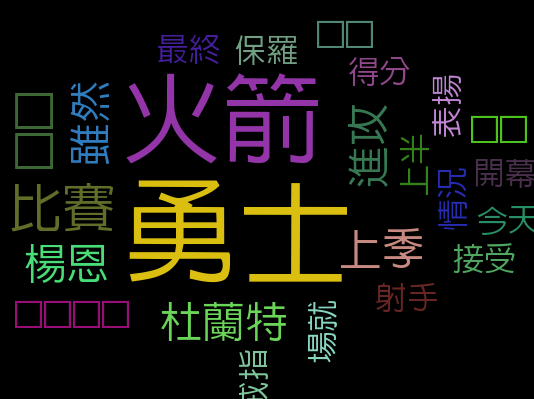

In [48]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image

sortefDic = [(k, worddic[k]) for k in sorted(worddic, key=worddic.get, reverse=True)]

swd = [w for w in sortefDic[0:50] if len(w[0]) >= 2 and w != '']
print(swd)

tags = make_tags(swd, maxsize=100)

create_tag_image(tags, 'wc.png', size=(600, 400), fontname='cwTeXHei-zhonly', background=(0,0,0))
Image(filename='wc.png')